# 0 - Imports

In [35]:
import pandas     as pd
import numpy      as np
import seaborn    as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
from matplotlib.patches import Circle

pd.set_option('display.float_format', '{:.2f}'.format)

## 0.1 - Loading data

In [3]:
df_raw = pd.read_csv('kc_house_data.csv')

# 1 - Helper functions

# 2 - Description data

## 2.1 - Data dimension

In [4]:
df_raw.shape

print(f'Quantidade de colunas: {df_raw.shape[0]}')
print(f'Quantidade de linhas: {df_raw.shape[1]}')

Quantidade de colunas: 21613
Quantidade de linhas: 21


## 2.2 - Columns

In [5]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

- id: Identificação do imóvel
- data: Data de venda do imóvel
- price: Preço do imóvel
- bedrooms: Quantidade de quartos
- bathrooms: Quantidade de banheiros
- sqft_living: Metragem da área de estar
- sqft_lot: Metragem da área do lote
- floors: Quantidade de andares
- waterfront: Vista para a água
- view: Se foi visualizado
- condition: Condição de conservação do imóvel
- grade: Nota geral dada a unidade habitacional 
- sqft_above: Metragem quadrada do imóvel
- sqft_basement: Metragem quadrada do porão
- yr_built: Ano de construção do imóvel
- yr_renovated: Ano de reforma do imóvel
- zipcode: Código postal
- lat: Latitude da localização do imóvel
- long: Longitude da localização do imóvel 
- sqft_living15: Metragem quadrada da sala de estar em 2015 (implica em algumas renovações)
- sqft_lot15: Metragem quadrada do lote em 2015 (implica em algumas renovações)

## 2.3 - Data types

In [6]:
df1 = df_raw.copy()

In [7]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df1['id'] = df1['id'].astype('str')
df1['date'] = pd.to_datetime(df1['date'])
df1['view'] = df1['view'].astype('str')
df1['condition'] = df1['condition'].astype('str')
df1['waterfront'] = df1['waterfront'].astype('str')
df1['zipcode'] = df1['zipcode'].astype('str')

## 2.4 - Check NA

In [9]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.5 - Check duplicates

In [10]:
print(f"Quantidade de dados duplicados: {df1.duplicated().sum()}")

Quantidade de dados duplicados: 0


## 2.6 - Descriptive statistical

In [11]:
#Seleção de atributos numéricos
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

#Seleção de atributos categóricos
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 2.6.1 - Numerical attributes

 - Analisando os aspectos estatísticos dos dados numéricos

In [16]:
#Medidas de tendência central
minimo = num_attributes.apply(np.min)
maximo = num_attributes.apply(np.max)
media = num_attributes.apply(np.mean)
mediana = num_attributes.apply(np.median)

#Medidas de dispersão
amplitude = num_attributes.apply(np.max) - num_attributes.apply(np.min)
desvio_padrao = num_attributes.apply(np.std)
variancia = num_attributes.apply(np.var)
cv = (desvio_padrao / media)*100

#Medidas de distribuição dos dados
skewness = num_attributes.apply(skew)
kurt = num_attributes.apply(kurtosis)



In [17]:
data_attributes = pd.concat([minimo, maximo, media, mediana, amplitude, desvio_padrao, variancia, cv, skewness, kurt], axis=1)

In [18]:
columns_new = ['min', 'max', 'mean', 'median', 'amplitude', 'std', 'var', 'cv', 'skewness', 'kurtosis']
data_attributes.columns=columns_new

In [19]:
data_attributes

,min,max,mean,median,amplitude,std,var,cv,skewness,kurtosis
price,75000.00,7700000.00,540088.14,450000.00,7625000.00,367118.70,134776142225.57,67.97,4.02,34.58
bedrooms,0.00,33.00,3.37,3.00,33.00,0.93,0.86,27.59,1.97,49.05
bathrooms,0.00,8.00,2.11,2.25,8.00,0.77,0.59,36.42,0.51,1.28
sqft_living,290.00,13540.00,2079.90,1910.00,13250.00,918.42,843494.65,44.16,1.47,5.24
sqft_lot,520.00,1651359.00,15106.97,7618.00,1650839.00,41419.55,1715579393.30,274.18,13.06,285.01
floors,1.00,3.50,1.49,1.50,2.50,0.54,0.29,36.14,0.62,-0.48
grade,1.00,13.00,7.66,7.00,12.00,1.18,1.38,15.35,0.77,1.19
sqft_above,290.00,9410.00,1788.39,1560.00,9120.00,828.07,685702.94,46.30,1.45,3.40
sqft_basement,0.00,4820.00,291.51,0.00,4820.00,442.56,195863.61,151.82,1.58,2.71
yr_built,1900.00,2015.00,1971.01,1975.00,115.00,29.37,862.76,1.49,-0.47,-0.66


### 2.6.2 - Categorial attributes

 - Analisando os dados categóricos em torno do preço de venda

In [24]:
cat_attributes.columns

Index(['id', 'date', 'waterfront', 'view', 'condition', 'zipcode'], dtype='object')

I) Evolução do preço ao longo do tempo

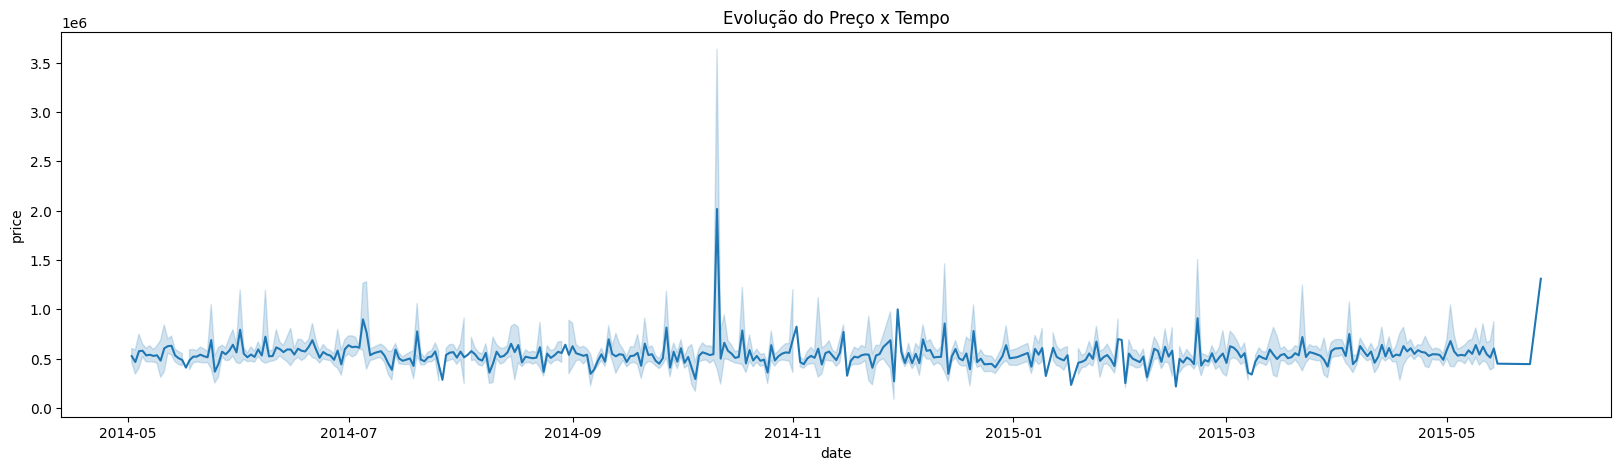

In [40]:
plt.figure(figsize=(20,5))
sns.lineplot(df1, x='date', y='price')
plt.title('Evolução do Preço x Tempo')
plt.show()

II) Distribuição do preço pela: waterfronte, view, conditions

<Axes: xlabel='condition', ylabel='price'>

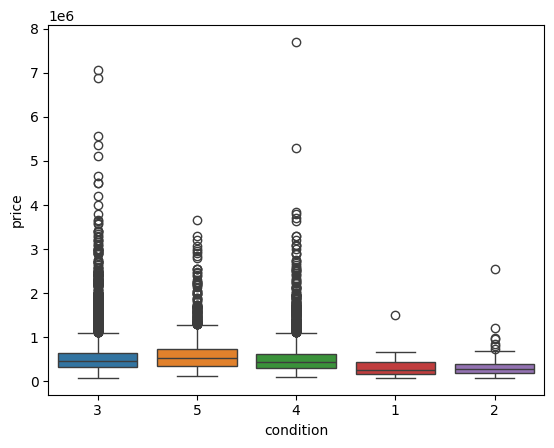

In [45]:
plt.figure()
sns.boxplot(df1, x='condition', y='price', hue='condition')

# 3 - Feature engineering